### ABM_List_2


1. Implement Conway’s Game of Life model (https://en.wikipedia.org/wiki/Conway_Game_of_Life) in a programming language of your choice. Your program should read initial configuration of the grid from a text file and generate an animation illustrating the evolution of the system.
2. Prepare configuration files resulting in interesting (in your opinion) patterns during the simulation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
import imageio
import os


In [2]:
def steps_of_life1(step_matrix): #This function returns stepmatrix of life following the rules of the Conway's game of life game
    neigbours_Count = sum(np.roll(np.roll(step_matrix, i, 0), j, 1)
                     for i in (-1, 0, 1) for j in (-1, 0, 1)
                     if (i != 0 or j != 0))
    return (neigbours_Count == 3) | (step_matrix & (neigbours_Count == 2))

C:\Users\user\AppData\Local\Temp\ipykernel_17480\2241290647.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(12, 6))


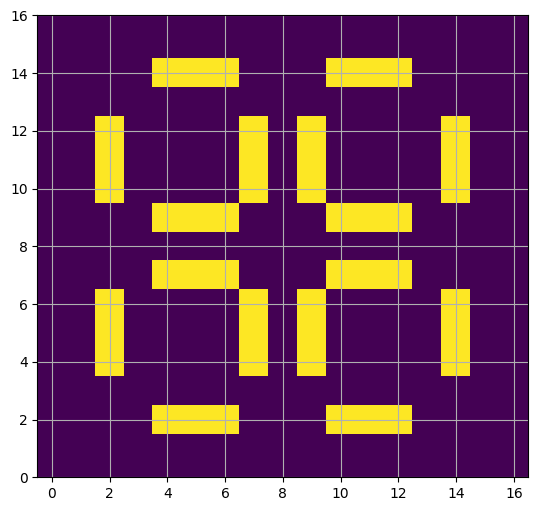

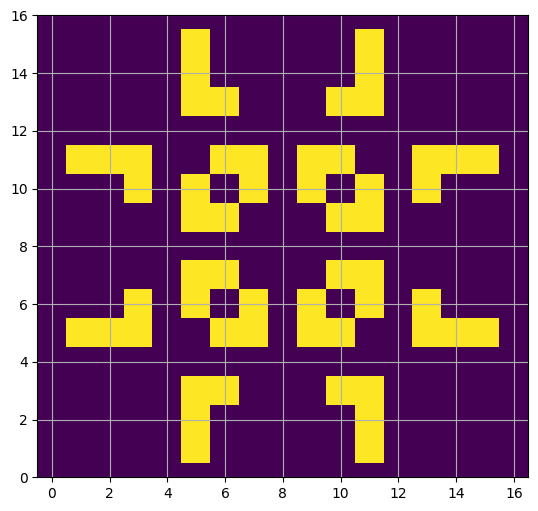

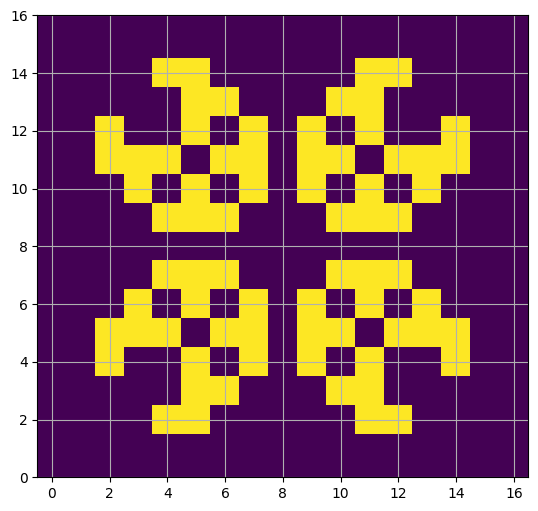

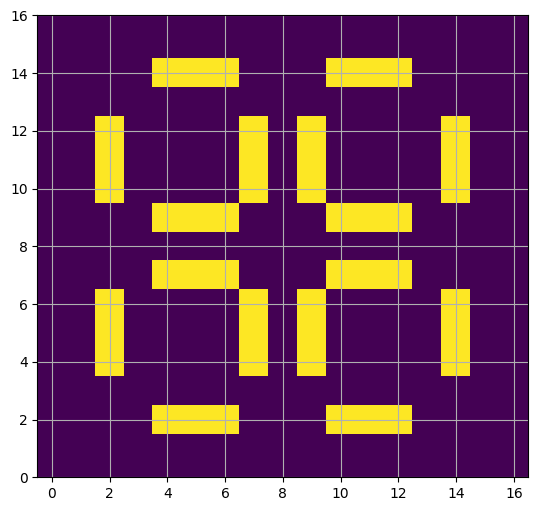

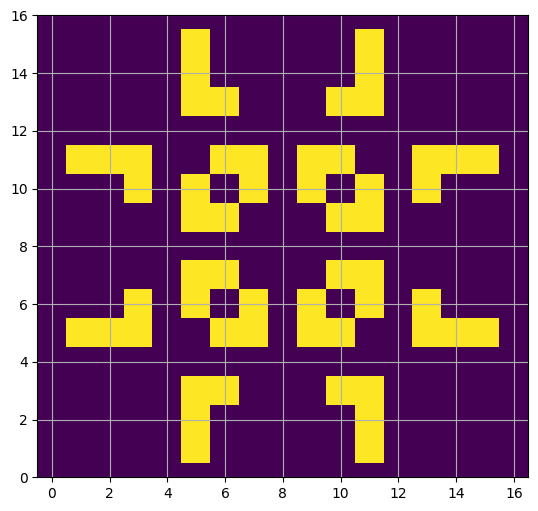

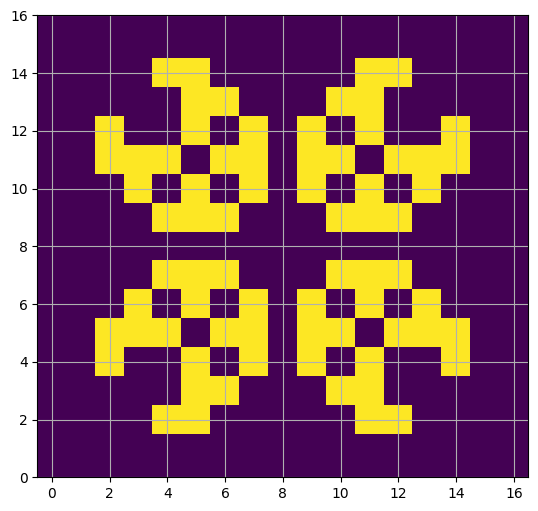

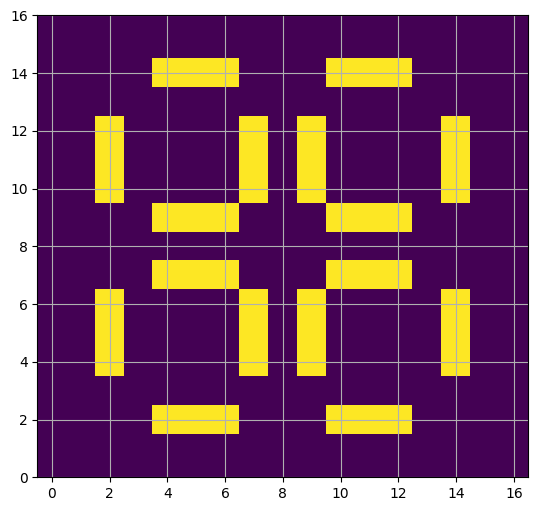

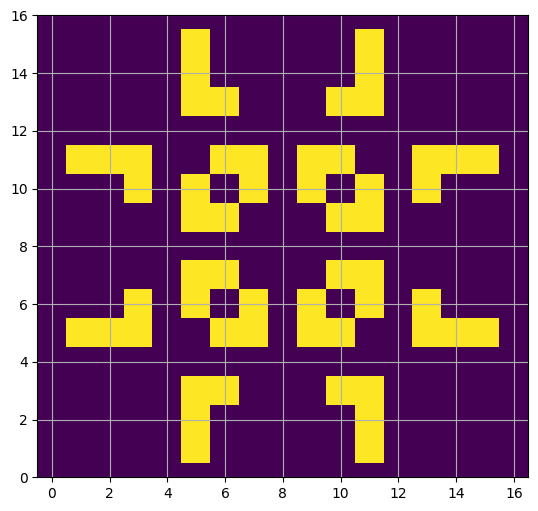

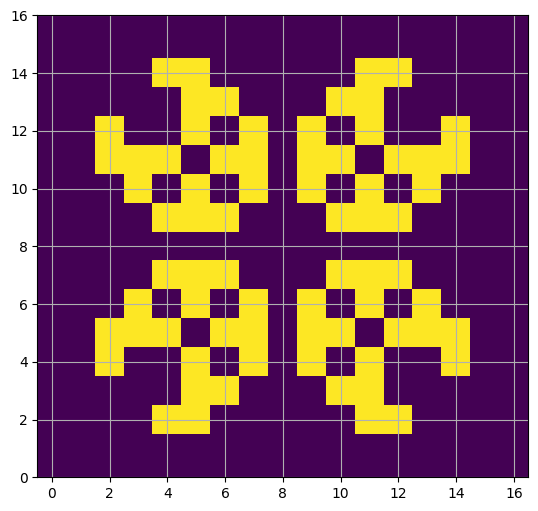

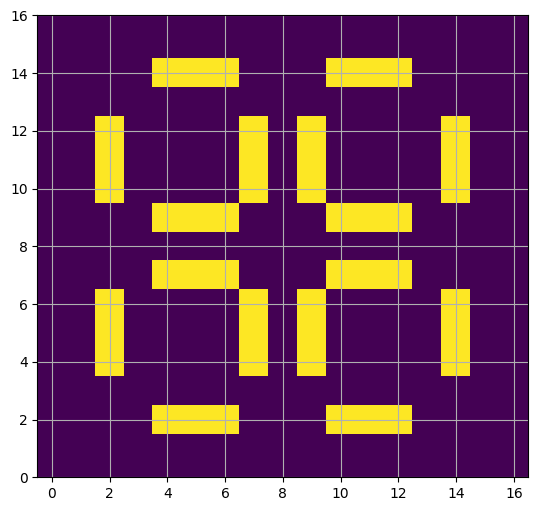

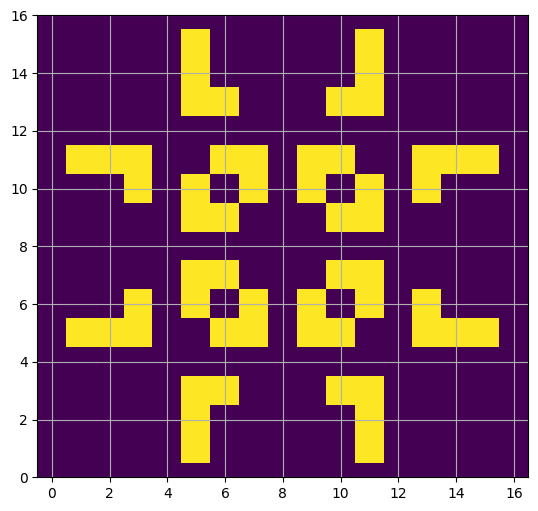

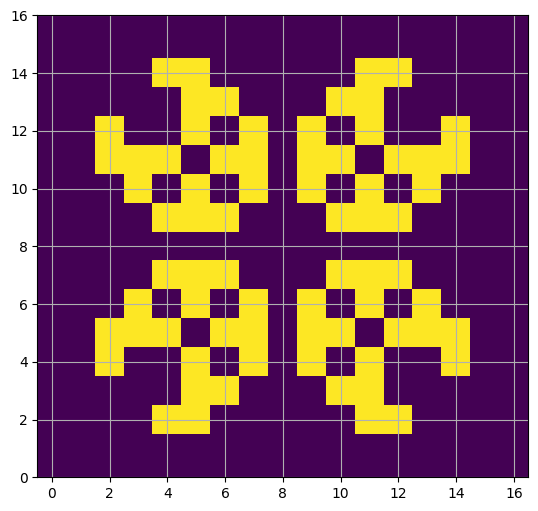

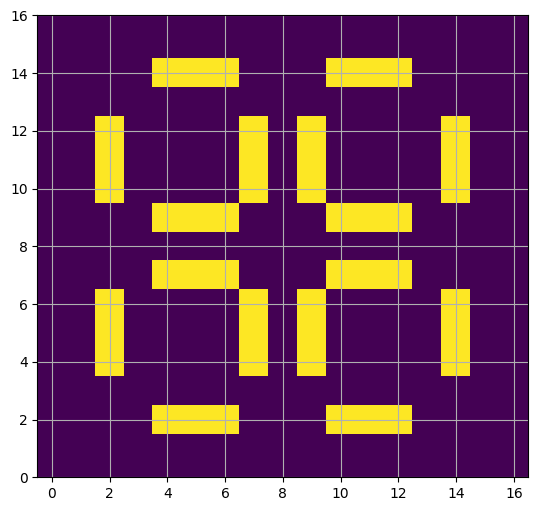

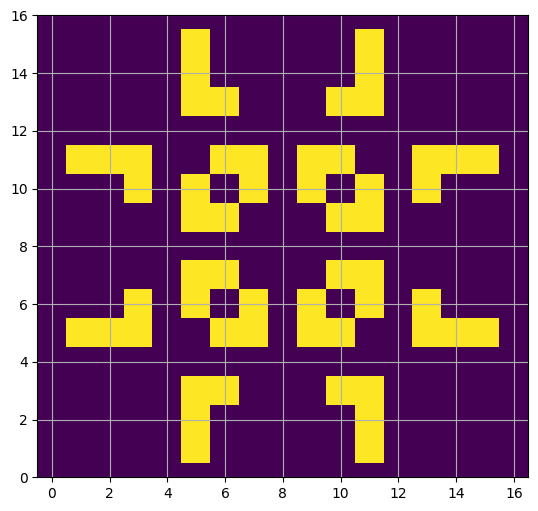

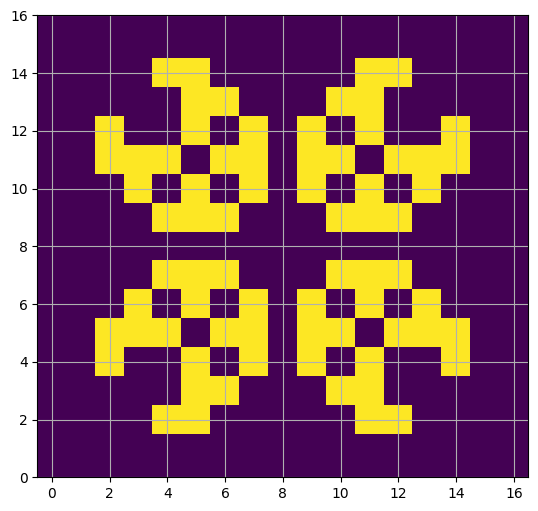

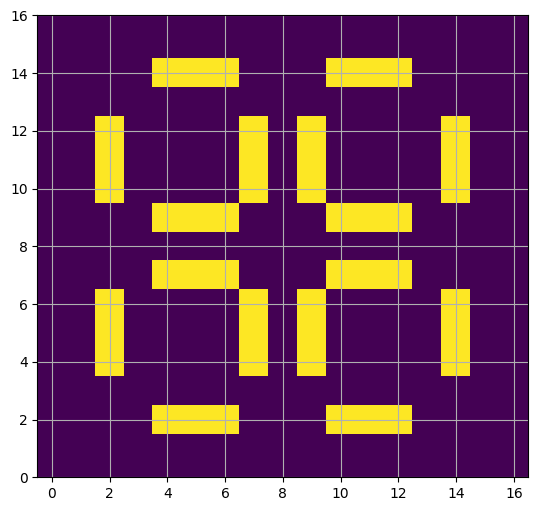

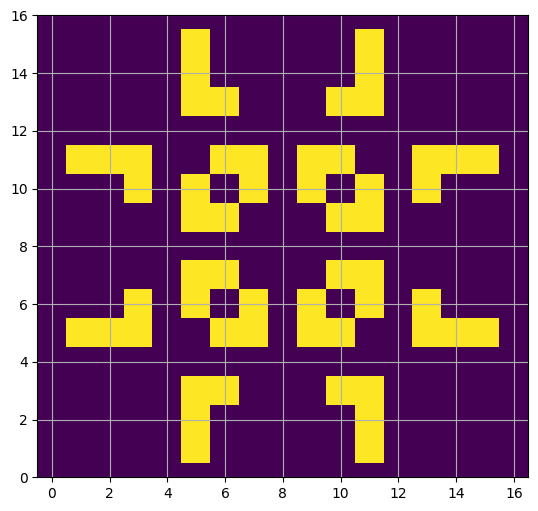

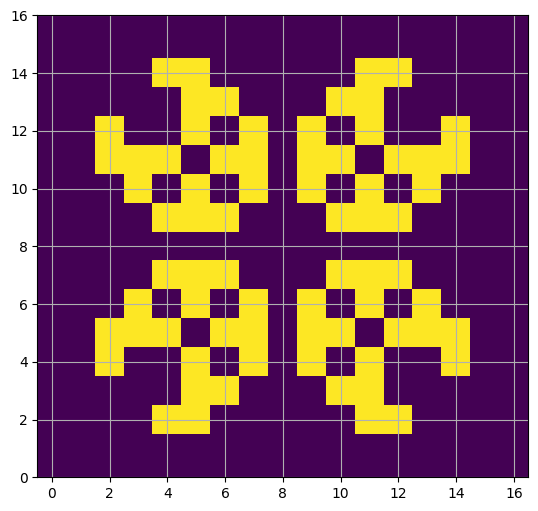

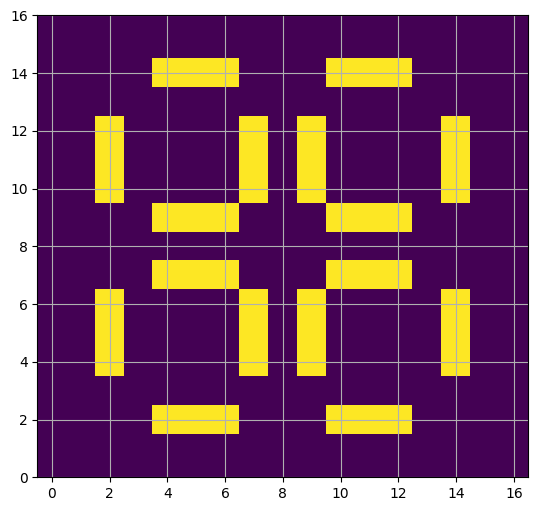

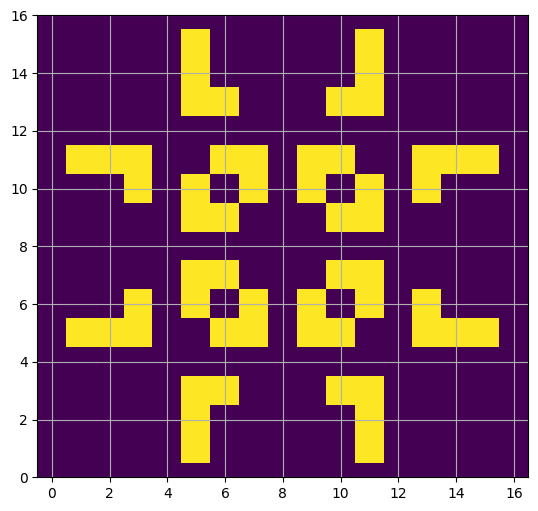

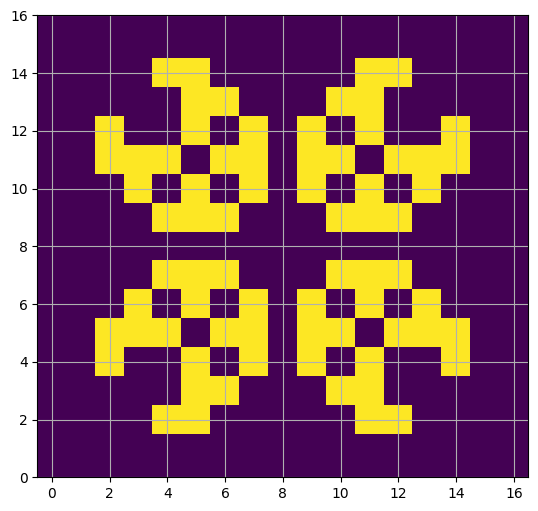

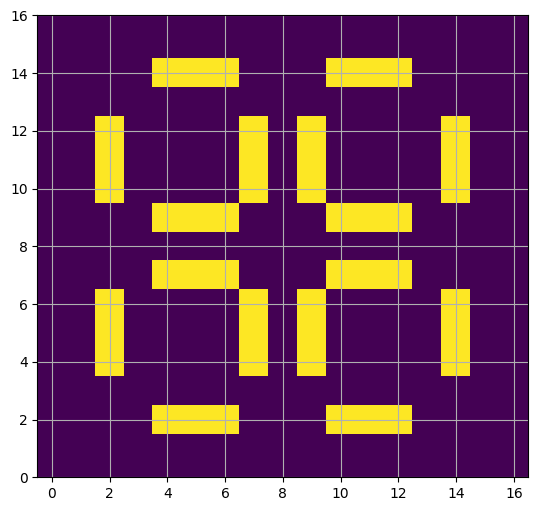

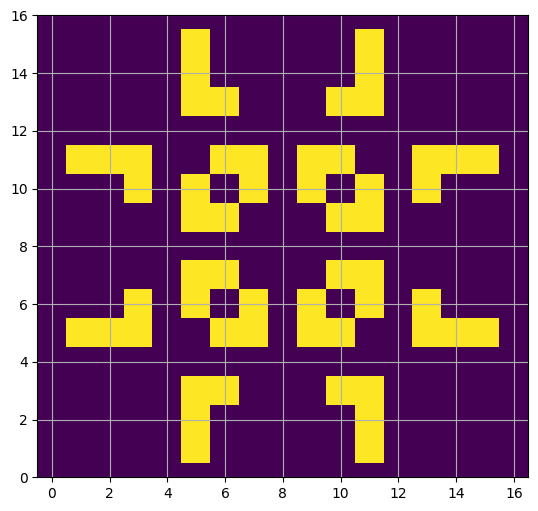

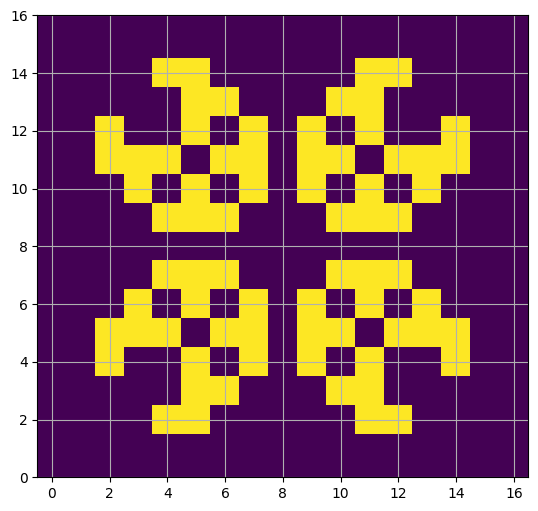

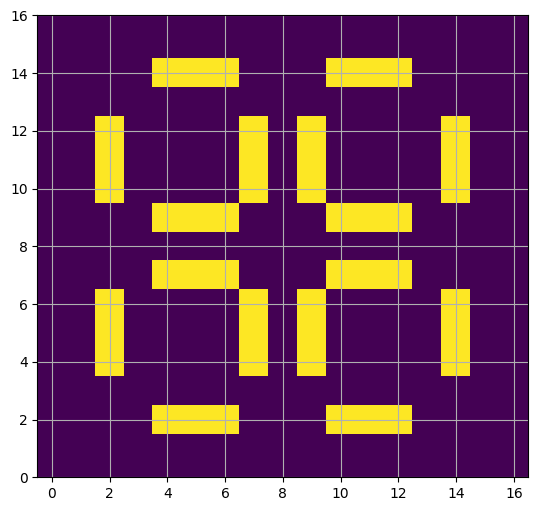

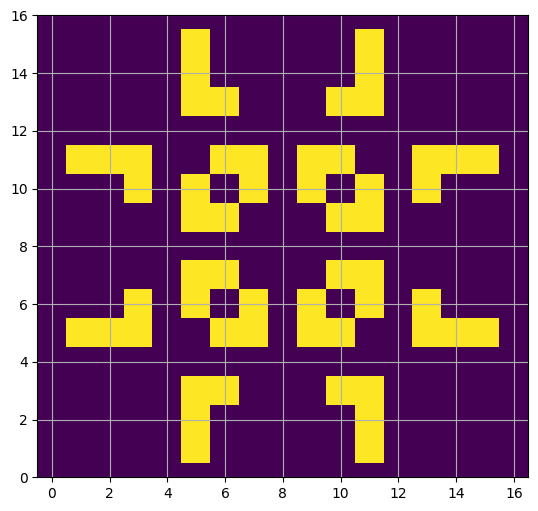

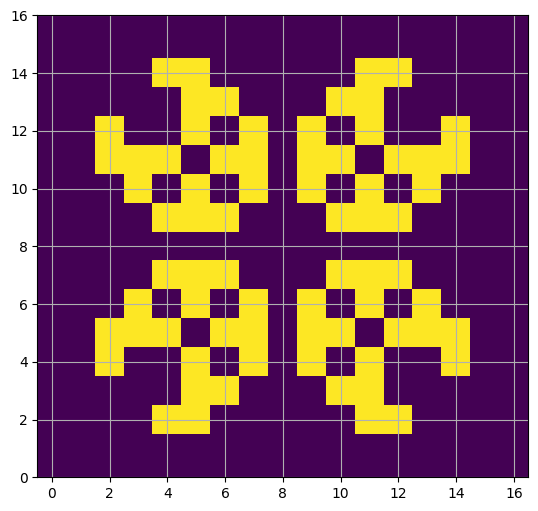

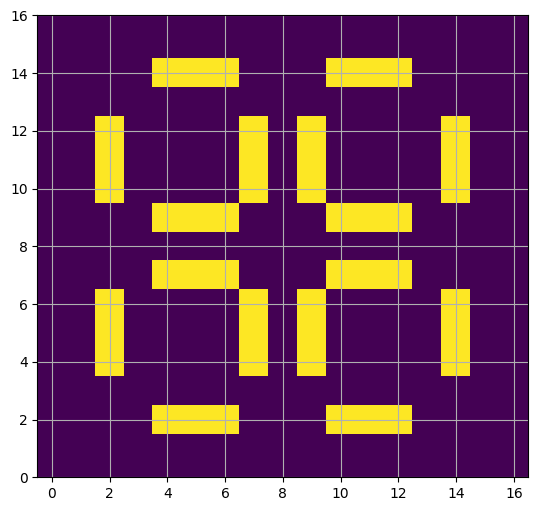

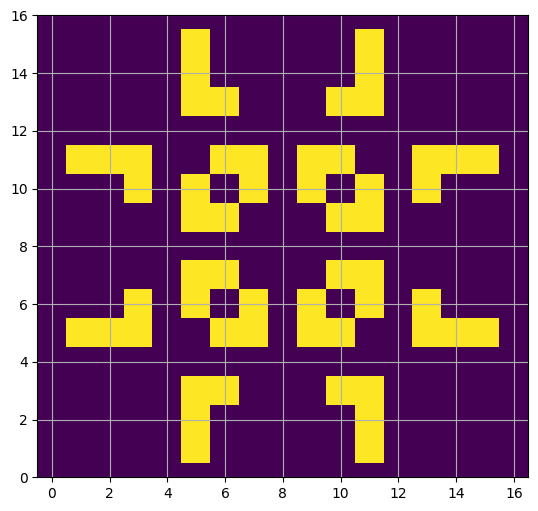

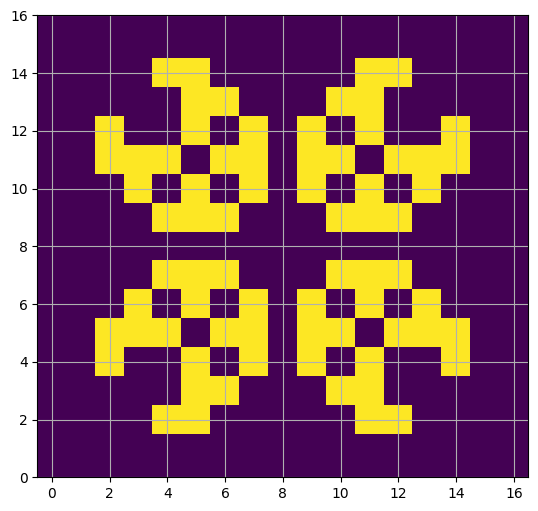

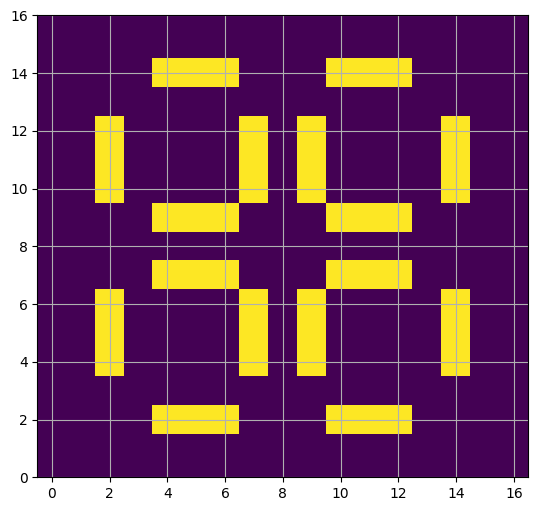

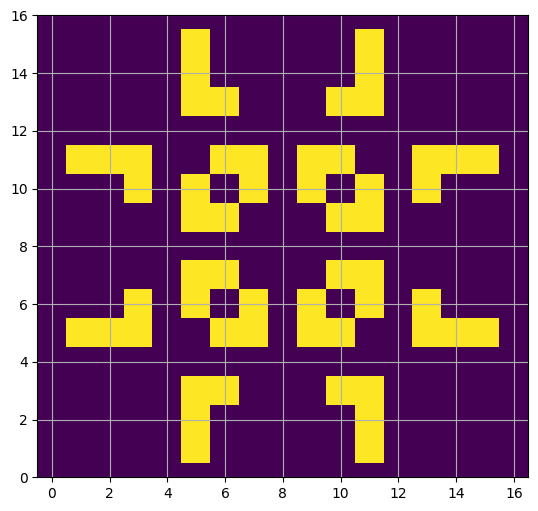

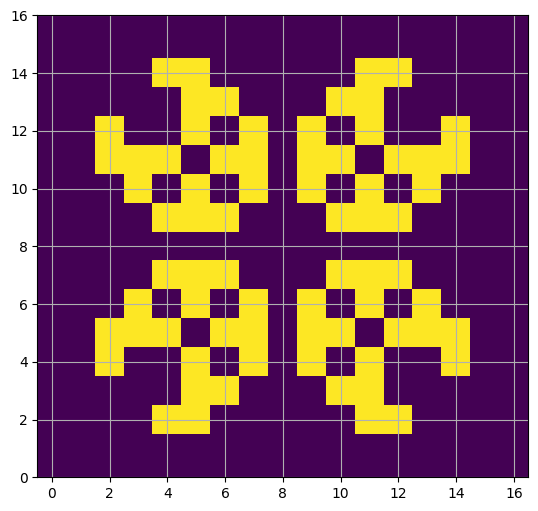

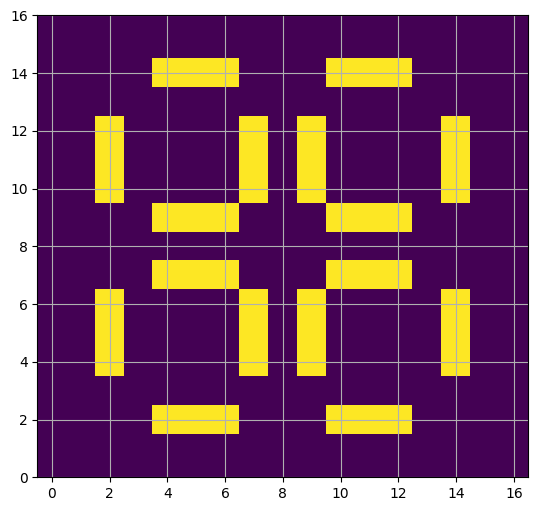

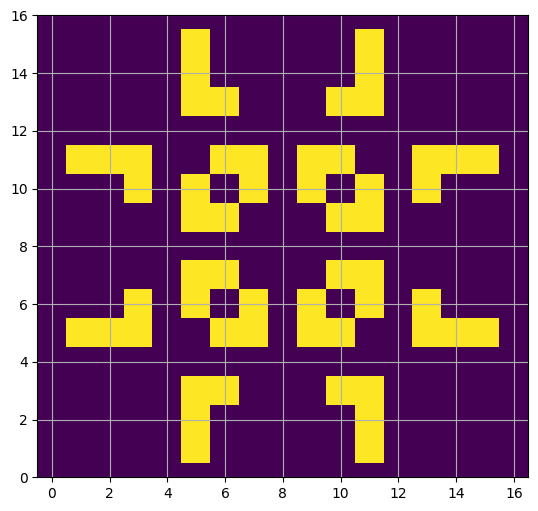

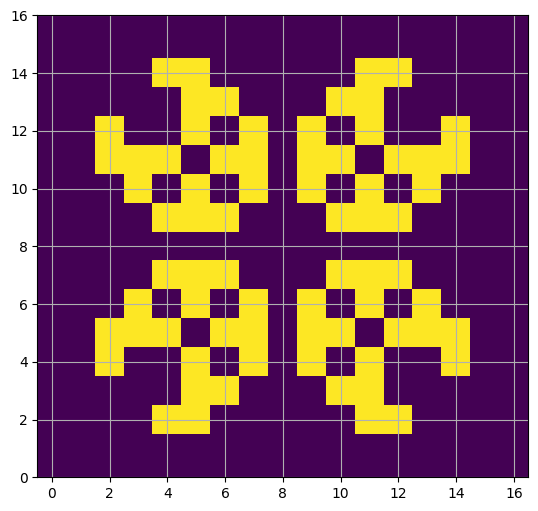

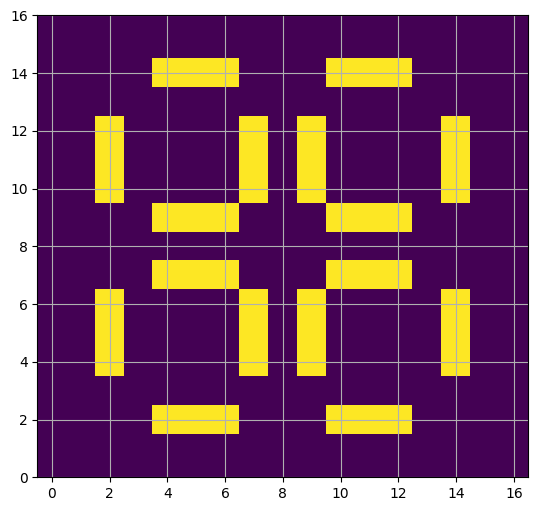

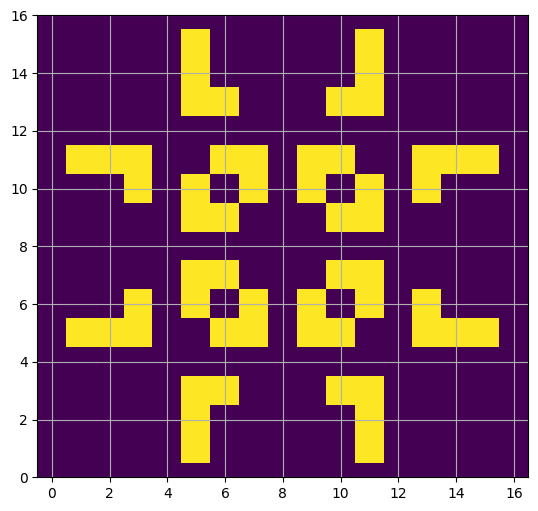

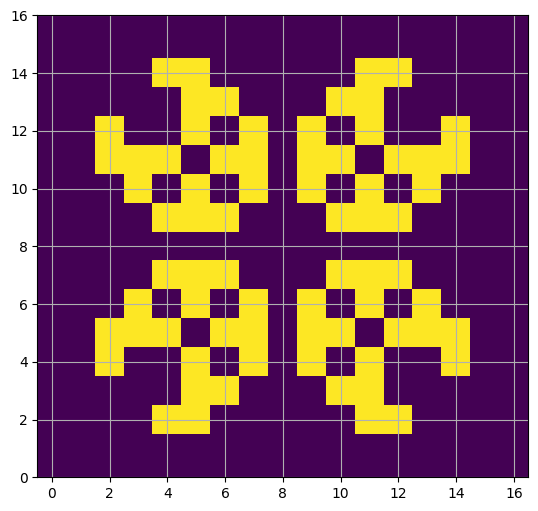

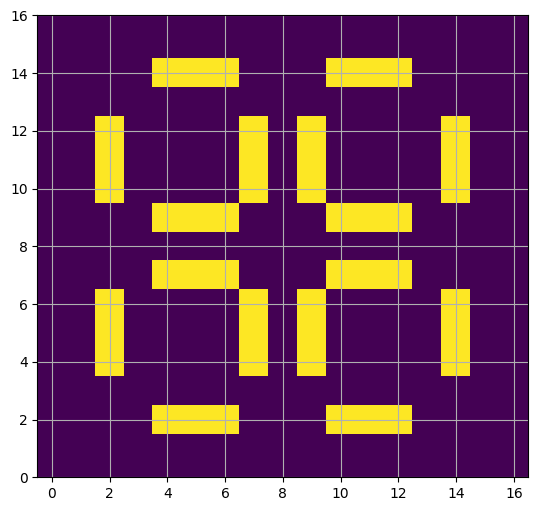

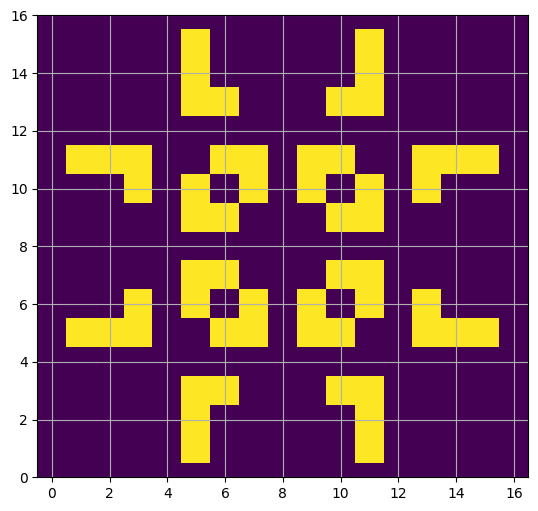

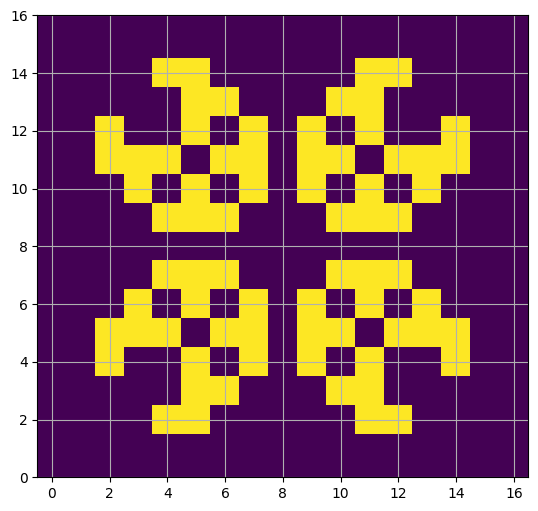

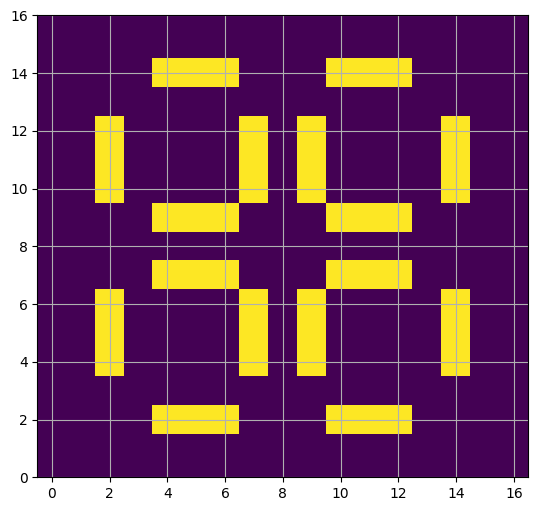

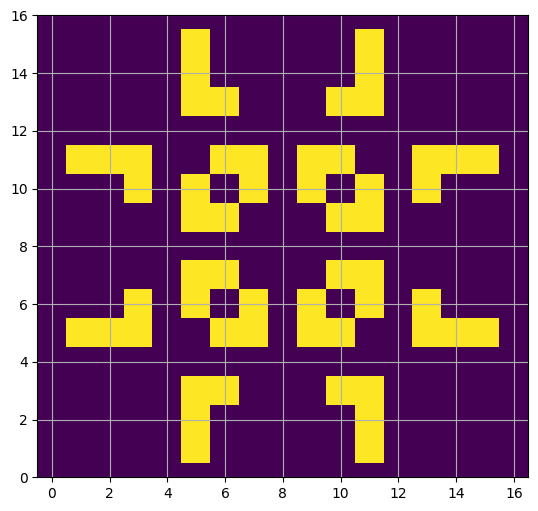

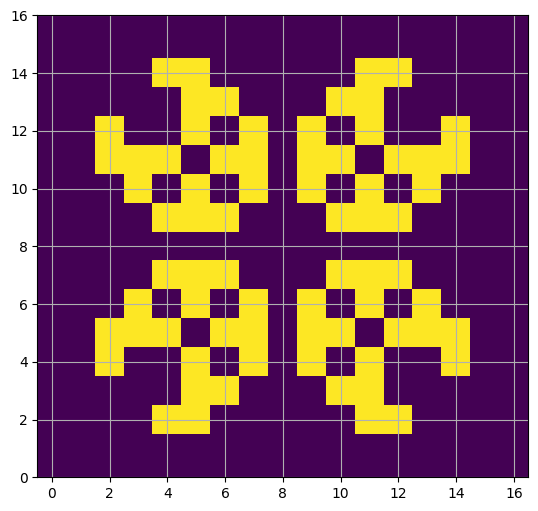

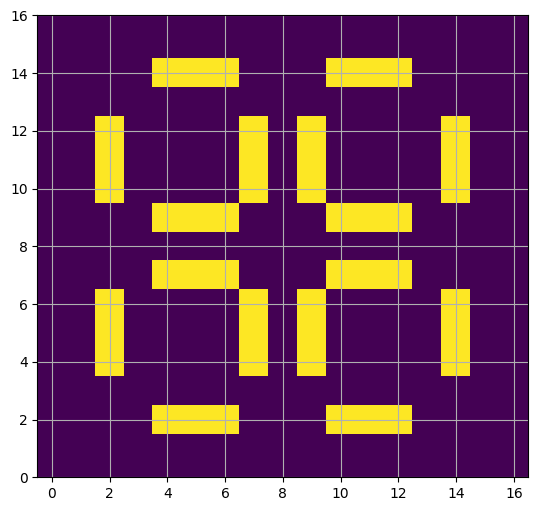

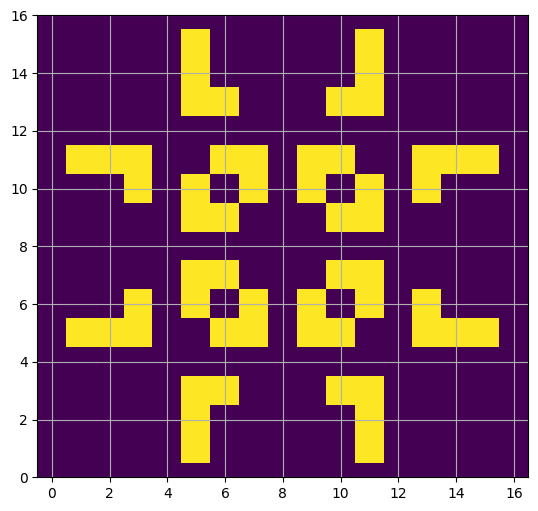

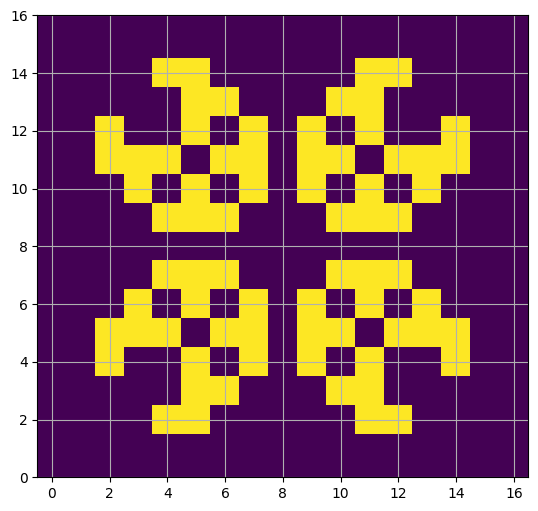

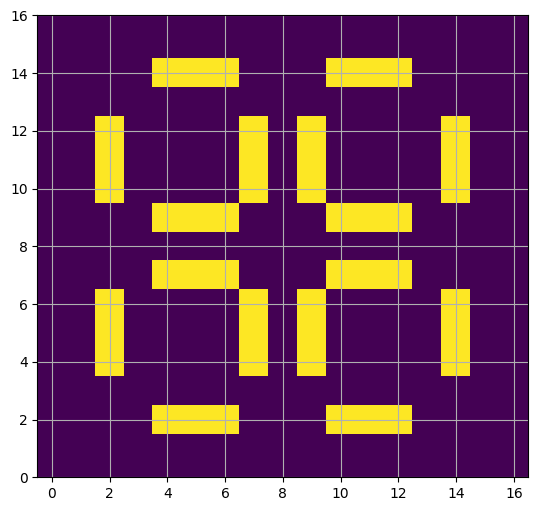

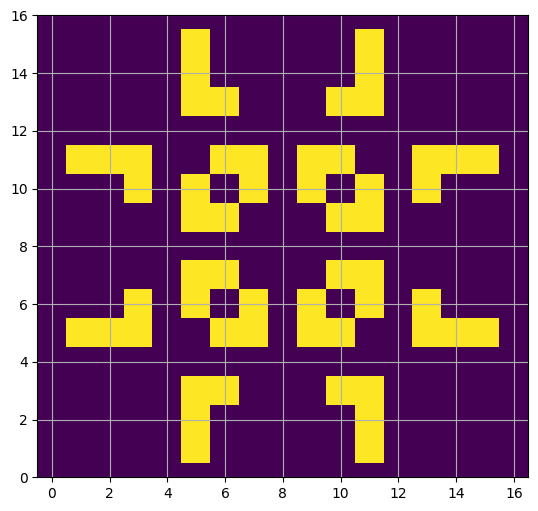

In [3]:
def game(): 
    # Plays the game and returns an image array
    Game_brd1 = np.loadtxt(f"init_config_.txt", dtype=bool)
    Images = []
    j = 1
    while j <= 50:
        new_state = steps_of_life1(Game_brd1)
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.imshow(Game_brd1)
        ax.grid()
        ax.set_ylim(0, new_state.shape[1] - 1)
        fig.canvas.draw()
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8',)
        image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        del fig, ax
        Images.append(image)
        Game_brd1 = new_state
        j += 1
       # Simulations  
    return Images

# Correcting indentation for the following lines
config_file = 3
trees = game()
imageio.mimsave(f"./game_{config_file}.gif", trees, duration=3)


New pattern suggested 

In [4]:
def steps_of_life2(current_step):
    neighbour_matrix = convolve2d(current_step, np.ones((3,3)), mode='same', boundary='wrap') - current_step
    return (neighbour_matrix == 3) | (current_step & (neighbour_matrix == 2))


C:\Users\user\AppData\Local\Temp\ipykernel_17480\1472774507.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(12,6))


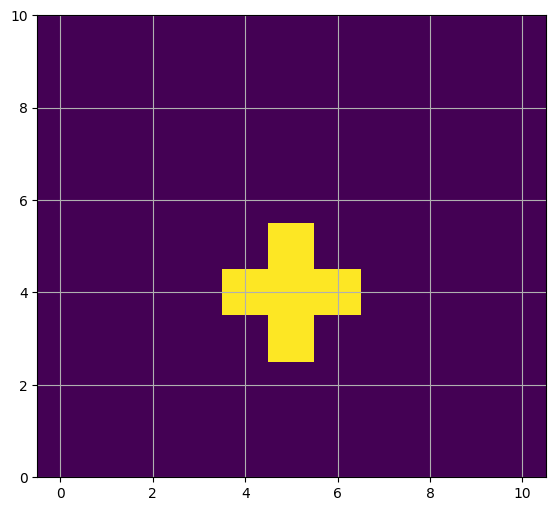

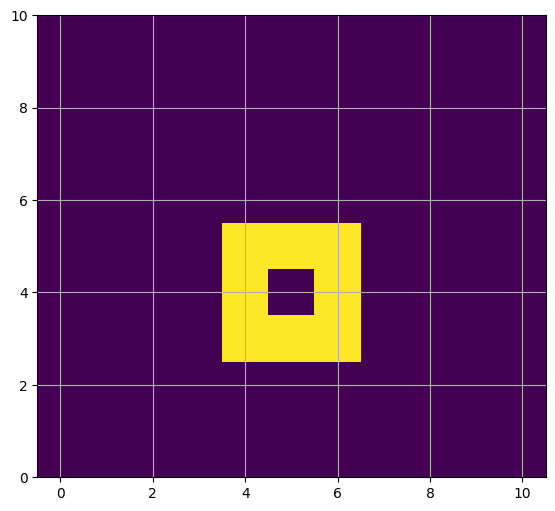

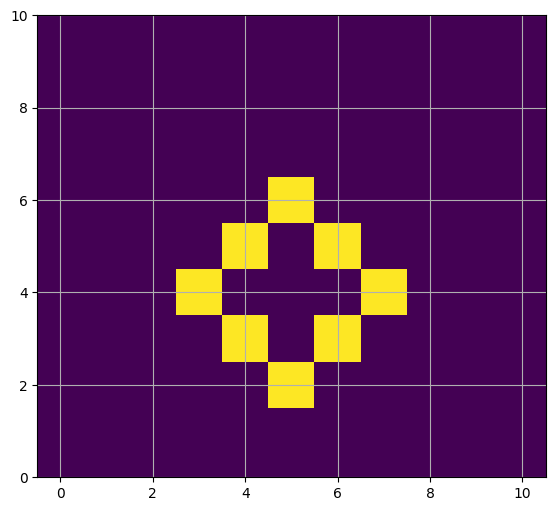

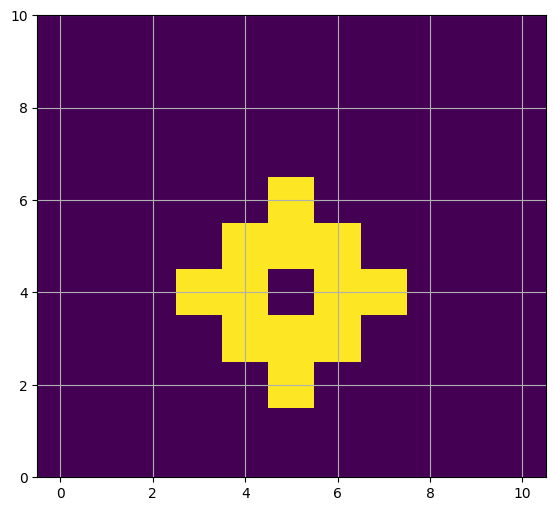

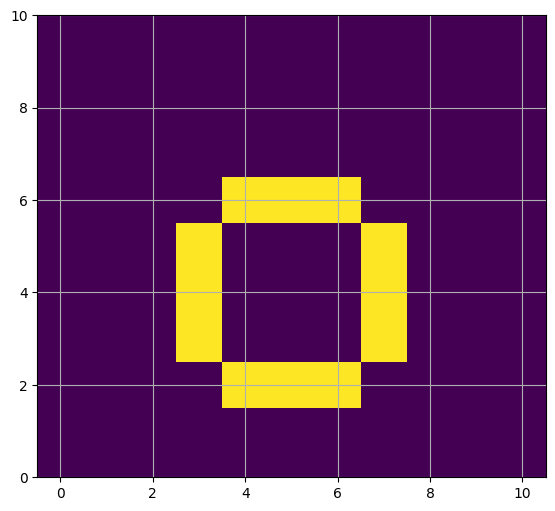

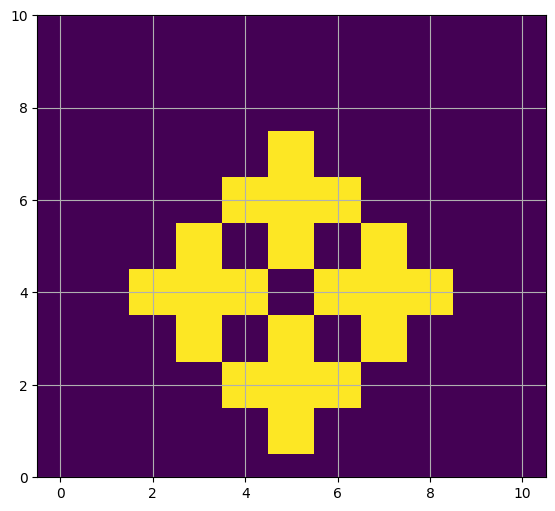

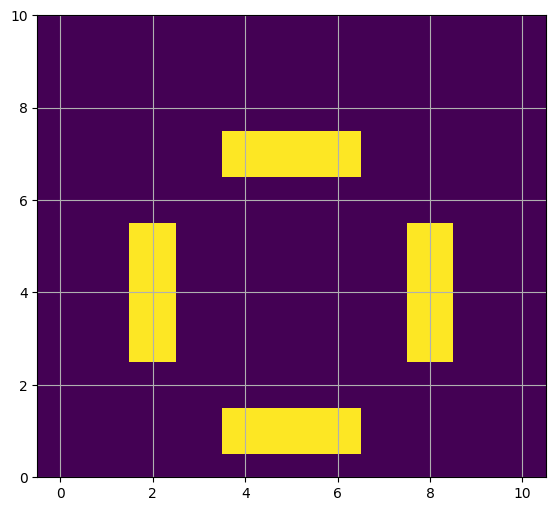

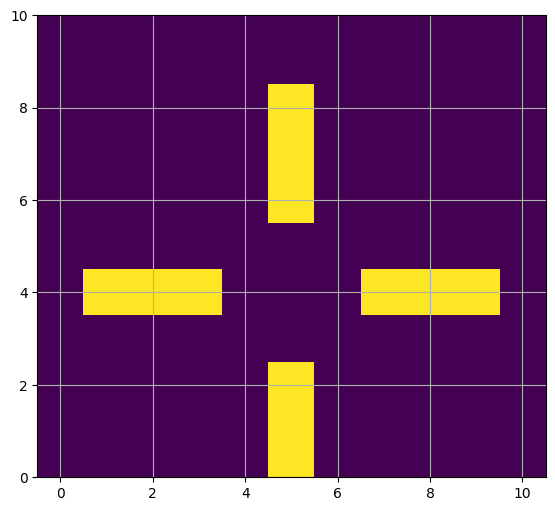

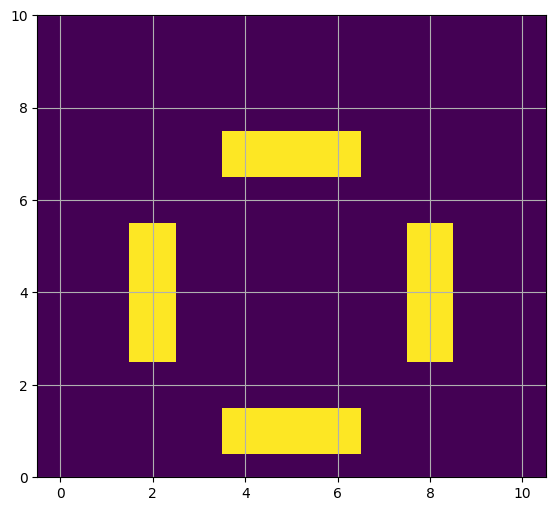

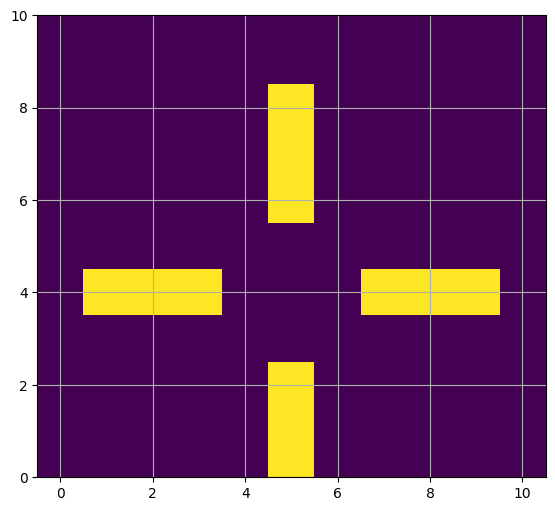

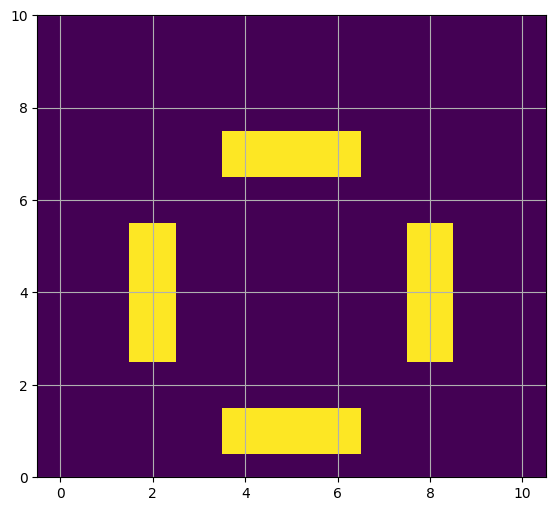

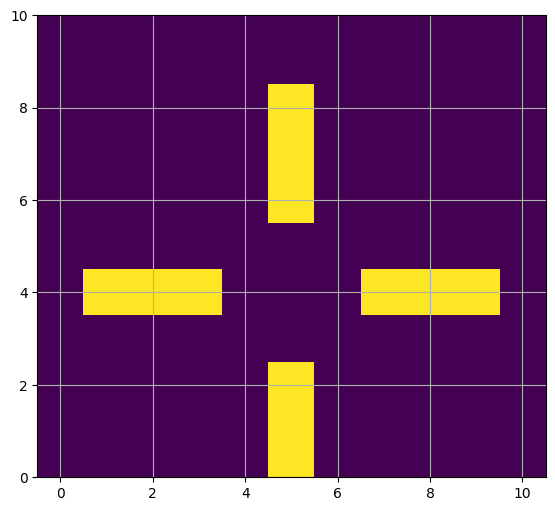

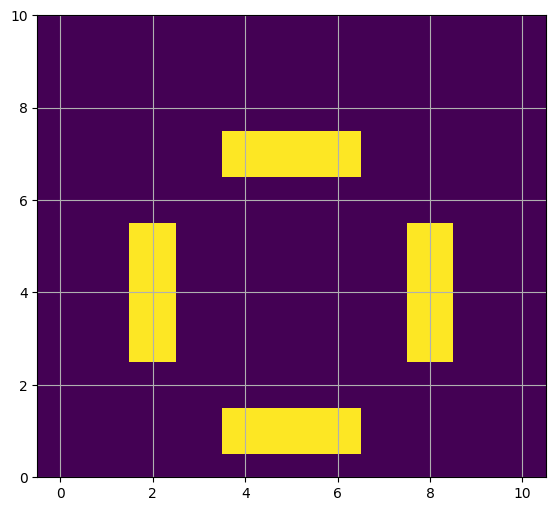

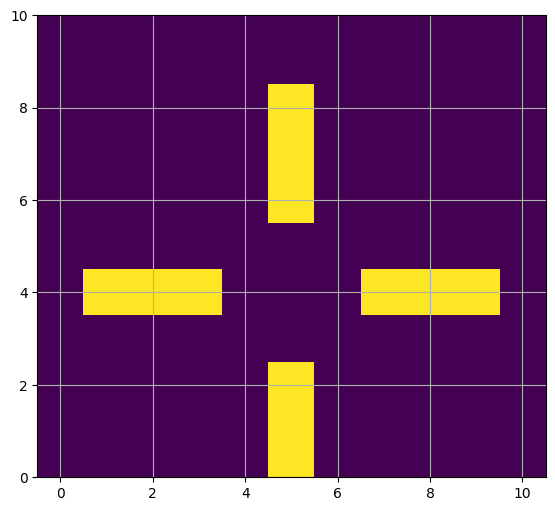

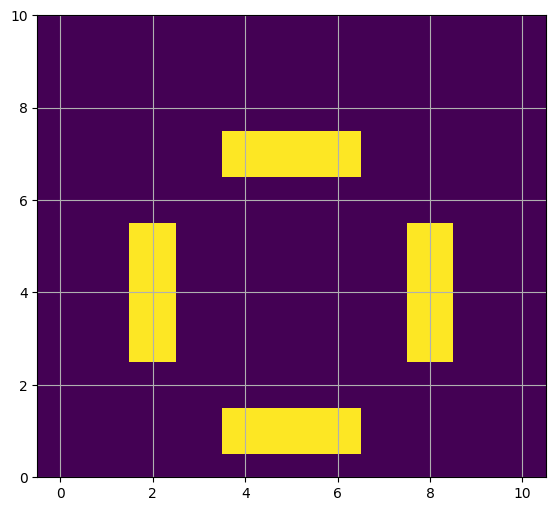

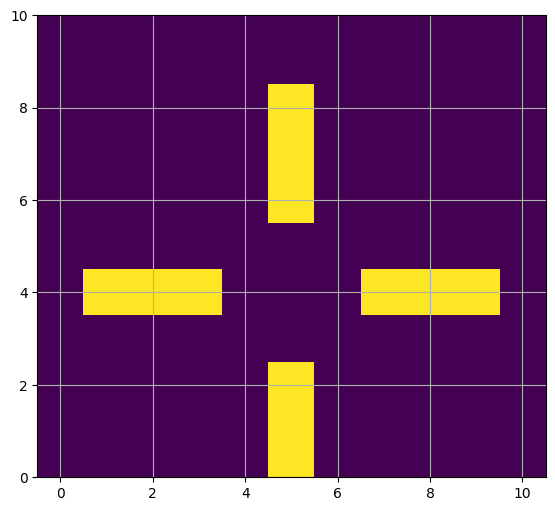

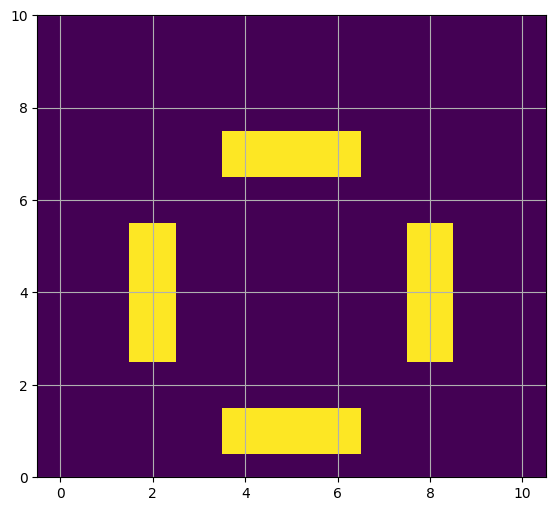

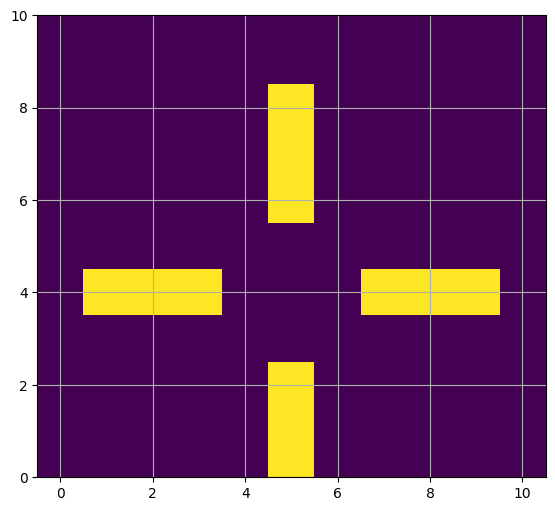

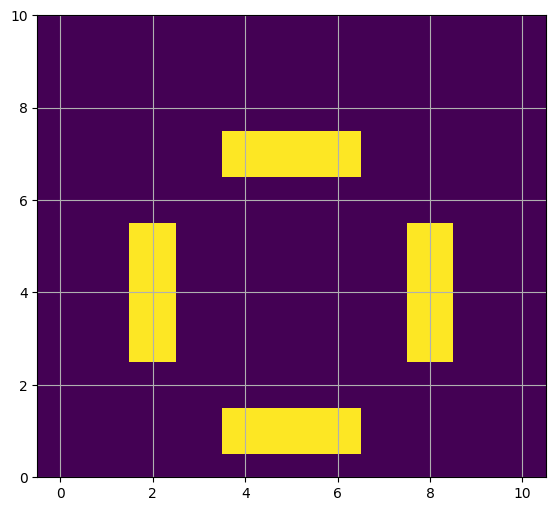

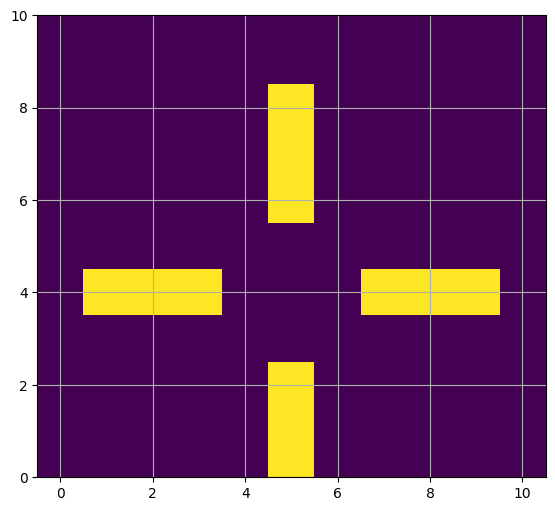

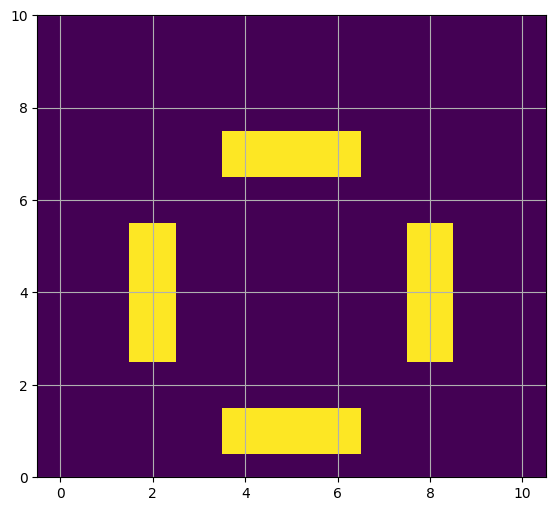

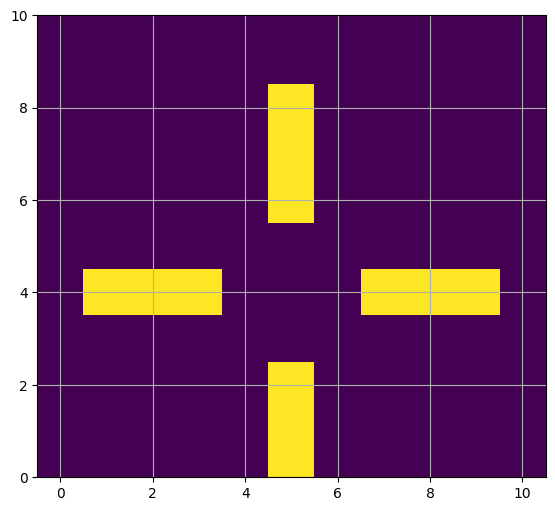

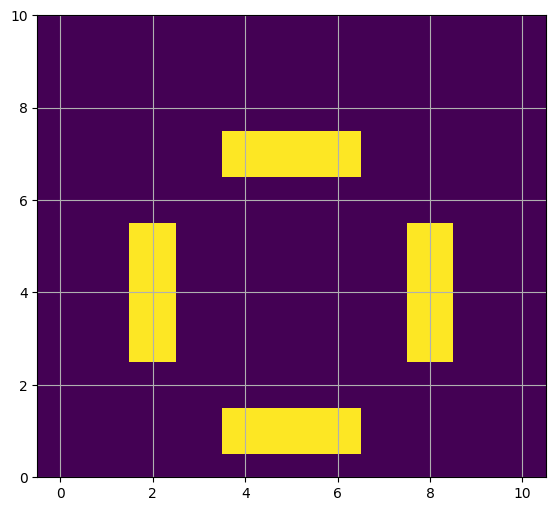

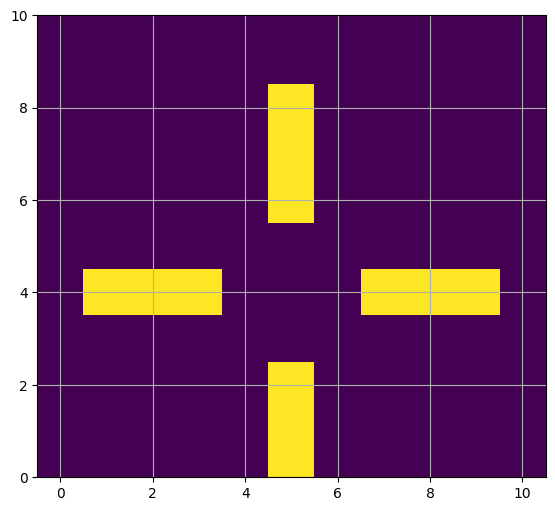

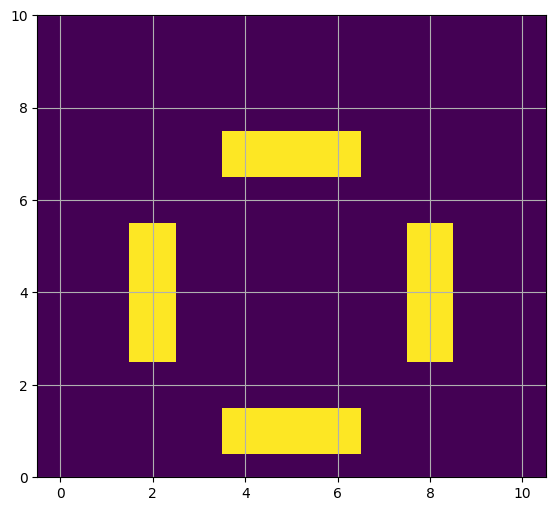

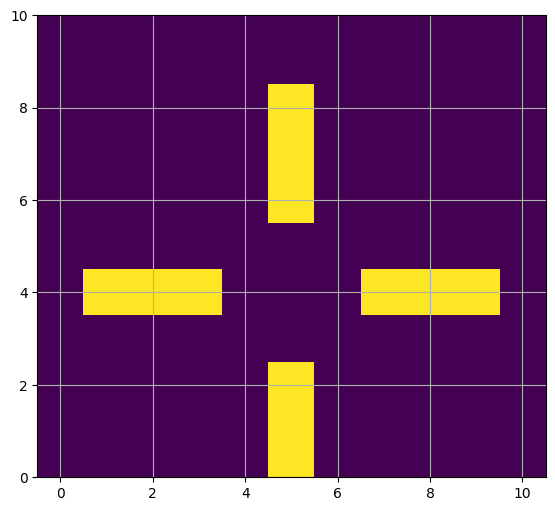

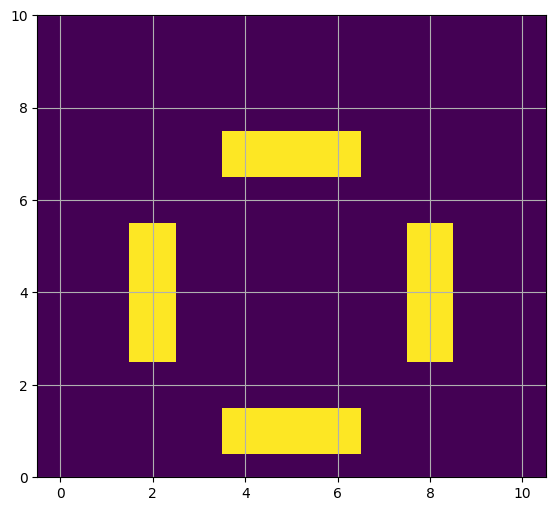

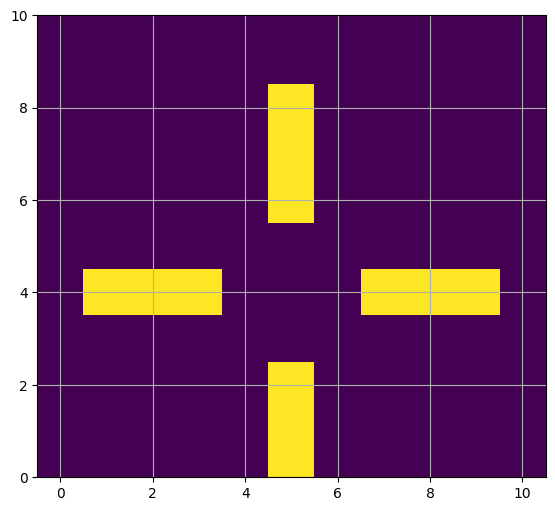

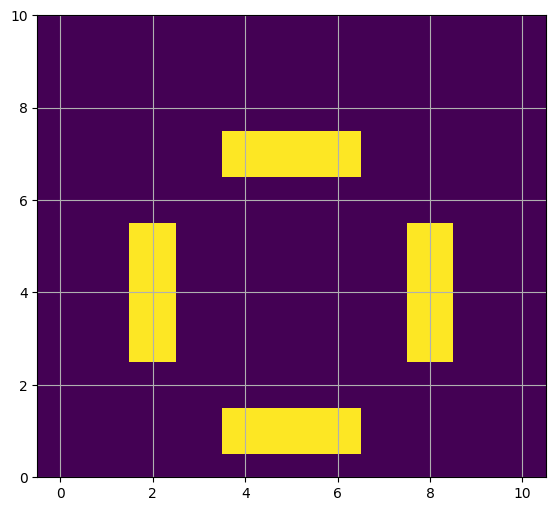

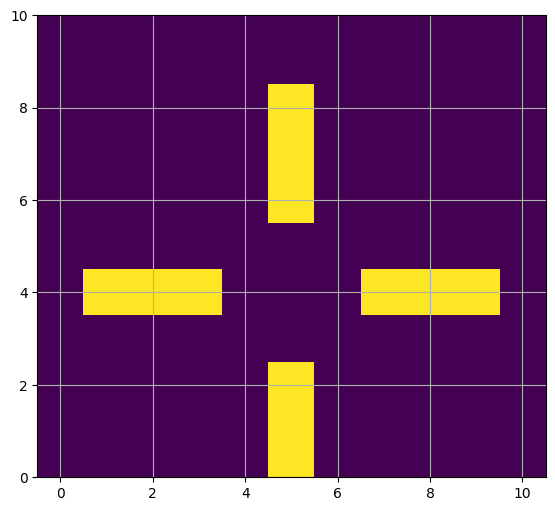

In [5]:
def game2():
    Game = np.loadtxt(f"init_config_1.txt", dtype=bool)
    Images = []
    j = 1
    while j <= 30:
        new_state = steps_of_life2(Game)
        fig, ax = plt.subplots(figsize=(12,6))
        ax.imshow(Game)
        ax.grid() 
        ax.set_ylim(0, new_state.shape[1]-1)
        fig.canvas.draw()   
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        del fig, ax
        Images.append(image)
        Game = new_state
        j += 1
        
    return Images
config_file = 2
trees = game2()
imageio.mimsave(f"./game_with_Periodic_boundary{config_file}.gif",trees, duration = 3)

